# $Z$- and $F_\beta$-score computations

In [1]:
import html

import matplotlib.pyplot as plt
import matplotlib.colors # https://matplotlib.org/2.0.2/users/colormaps.html
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

# Be sure the code is correct when excluding warnings!
import warnings
warnings.filterwarnings("ignore") # ignore boring warnings

In [2]:
# Minor plot tweaks
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']});
matplotlib.rc('text', usetex=True);

params = { 'font.size': 16,}
plt.rcParams.update(params)

sns.despine(trim=True, left=True);

<Figure size 640x480 with 0 Axes>

In [3]:
def Fb(tp, fn, fp, beta=1):
    """Compute F_beta score for a given number of true/false positive/negative values
    Parameters
    ----------
    tp: quantity of true positive values
    fn: quantity of false negative values
    fp: quantity of false positive values
    beta: value for which recall is considered \beta times as important as precision:
          Default value is beta=1
    """
    return ((1+beta*beta)*tp) / ((1+beta*beta)*tp + beta*beta*fn + fp)

In [4]:
# Import whole STELLA data
dfSTELLA = pd.read_csv("asd/patient-metabolite-matrix.csv")
dfSTELLA.set_index("Unnamed: 0", inplace=True)

dfSTELLA

# Pick Kang's patients (21 Neurotypical and 23 ASD)
# Previously used data comes from three different ASD experimental studies.
# The first block of both the neurotypical and the ASD parts comes from Kang's experiment.
cols = dfSTELLA.columns
cols = [c for c in cols if("Control" in c and int(c[-2:])<22) or ("Autism" in c and int(c[-2:])<45)]
dfSTELLA = dfSTELLA[cols]

# Rename STELLA's columns as Kang's
for i in range(len(dfSTELLA.columns)):
    if i < 22:
        cols[i] = "N"+f"{(i+1):02d}"
    else:
        cols[i] = "A"+f"{(i+1-21):02d}"

dfSTELLA.columns = cols
dfSTELLA

,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
(+)-5-chloromuconolactone,-0.056968,-0.002280,-0.075181,-0.000570,-0.006370,-0.001195,-0.007829,-0.002269,-0.011533,-0.002411,...,-0.003992,-0.000074,0.000000,-0.003041,-0.055001,-0.020235,-0.042792,-0.006177,-0.047942,0.000000
(-)-beta-caryophyllene,0.000000,0.000000,0.000109,0.000146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(-)-beta-elemene,0.000000,0.000000,0.000109,0.000146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1,4-alpha-D-galacturonosyl)(n)",0.000000,0.000000,0.000219,0.000292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1,4-alpha-D-galacturonosyl)(n+1)",0.000000,0.000000,-0.000219,-0.000292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xanthine,0.033660,0.003524,0.040369,0.003977,0.006723,0.007254,0.005730,0.002715,0.009152,0.002743,...,0.004246,0.000183,0.009194,0.002099,0.035032,0.013852,0.079815,0.003454,0.023975,0.000002
xanthosine,-0.067321,-0.007049,-0.080738,-0.008103,-0.013447,-0.014621,-0.011460,-0.005430,-0.018304,-0.005486,...,-0.008492,-0.000368,-0.018389,-0.004198,-0.070064,-0.027704,-0.170642,-0.007060,-0.047952,-0.000005
xylitol,0.000000,0.000000,-0.000109,-0.000146,0.000000,-0.000102,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Read Kang Excel file (supplementary data of the article)
# NOTE: NMR metabolites (Unit: micromole per g (dry stool))
dfKang2017 = pd.read_excel("../data/kang2017/1-s2.0-S1075996417302305-mmc2.xlsx", "metabolites")
dfKang2017.columns = dfKang2017.iloc[0]
dfKang2017.drop(index=0, inplace=True)
dfKang2017.reset_index
dfKang2017["Sample ID"] = dfKang2017["Sample ID"].str.lower()

substitutions = {r"β": "beta"} # fix spelling (Kang-related ASCII issue)
dfKang2017.replace(substitutions, regex=True, inplace=True)
dfKang2017.dropna(inplace=True)
dfKang2017

# Plot the dataset
"""
dfKang2017.set_index("Sample ID", inplace=True)
sns.heatmap(dfKang2017, cmap="viridis")
""";

In [6]:
# Find common metabolites between STELLA (computationally-obtained) and Kang (experimentally-obtained)
metabolitesKang2017 = list(dfKang2017["Sample ID"])
metabolitesSTELLA = list(dfSTELLA.index)
commonMetabolites = [m for m in metabolitesKang2017 if m in metabolitesSTELLA]

# Urea is not experimentally found!
commonMetabolites = [m for m in commonMetabolites if m != "urea"]


print("\nKang (2017) contains {} metabolites.".format(len(metabolitesKang2017)))
print("STELLA contains {} metabolites.".format(len(metabolitesSTELLA)))
print("There are in total {} common metabolites: {}".format(len(commonMetabolites), commonMetabolites))


Kang (2017) contains 61 metabolites.
STELLA contains 1406 metabolites.
There are in total 19 common metabolites: ['acetate', 'ethanol', 'formate', 'fumarate', 'glycerol', 'glycine', 'malonate', 'methanol', 'methylamine', 'nicotinate', 'phenylacetate', 'pyruvate', 'succinate', 'taurine', 'thymine', 'trimethylamine', 'uracil', 'xanthine', 'tyramine']


## The metabolite(s) at stake

### Dataframes preparation

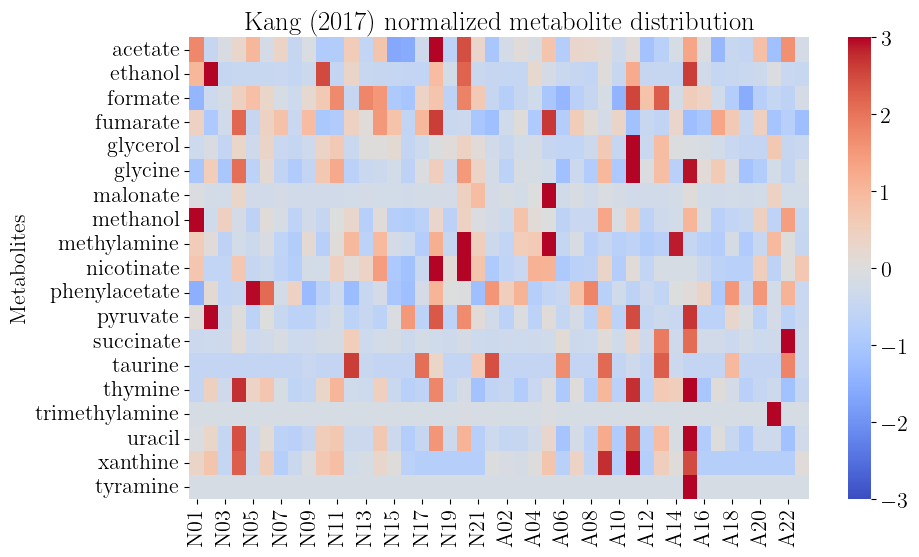

In [7]:
# Keep only common metabolites
dfK = dfKang2017[dfKang2017["Sample ID"].isin(commonMetabolites)].copy()
dfK.set_index("Sample ID", inplace=True)

# z-normalized dataframe
dfKpm = ((dfK.T-dfK.T.mean())/dfK.T.std()).T # Pandas operations are column-wise!

ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(dfKpm, vmin=-3, vmax=3, cmap="coolwarm");
ax.set_xlabel("");
ax.set_ylabel("Metabolites");
ax.set_title("Kang (2017) normalized metabolite distribution");

plt.savefig("plots/kang-df.pdf", bbox_inches="tight")

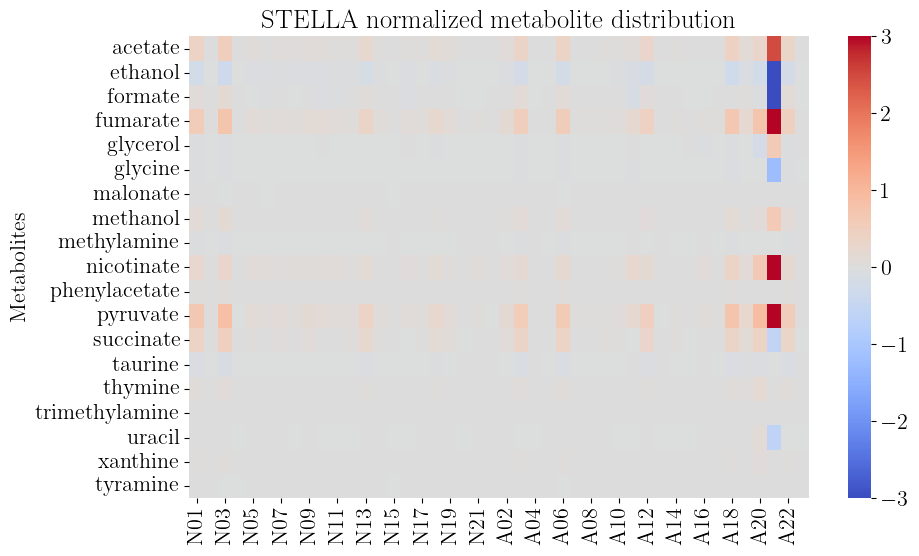

In [8]:
# Keep only common metabolites
dfS = dfSTELLA.loc[commonMetabolites].copy() # standard data

df = (dfS-dfS.mean())/dfS.std() # normalized STELLA dataframe
dfSpm = dfSTELLA.loc[commonMetabolites].copy() # positive/negative data

# Custom colormap
br = ("red", "blue")
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("Custom", br, len(br))

ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(dfSpm, vmin=-3, vmax=3, cmap="coolwarm");
ax.set_xlabel("");
ax.set_ylabel("Metabolites");
ax.set_title("STELLA normalized metabolite distribution");

plt.savefig("plots/stella-df.pdf", bbox_inches="tight")

In [9]:
dfz = dfK.copy()
dfz = ((dfz.T - dfz.T.mean())/(dfz.T.std())).T
dfz.dropna(inplace=True)

sz = dfz.T.describe().loc["mean"].T
szpm = sz/np.abs(sz) # +1 produced, -1 consumed
szpm

Sample ID
acetate           1.0
ethanol          -1.0
formate          -1.0
fumarate         -1.0
glycerol          1.0
glycine          -1.0
malonate         -1.0
methanol         -1.0
methylamine       1.0
nicotinate        1.0
phenylacetate    -1.0
pyruvate          1.0
succinate         1.0
taurine          -1.0
thymine           1.0
trimethylamine    1.0
uracil            1.0
xanthine          1.0
tyramine         -1.0
Name: mean, dtype: float64

### $F_\beta$-score

In [10]:
# Dataframe to analyze
dfS = dfSTELLA.loc[commonMetabolites].copy()
dfCounter = dfS.copy()
choicesWT = ["TN", "FP"]
choicesASD = ["TP", "FN"]

# We consider null metabolite as produced
dfCounter[dfCounter == 0] = 1
dfCounter = 2*dfCounter/np.abs(dfCounter)

# For each of STELLA's data spot true negative and false positive / true positive and false negative
for c in dfCounter:
    dfCounter[c] += szpm
    
    # Spot true negative and false positive
    conditionsWT = [dfCounter[c] == -3, # TN
                    dfCounter[c] == +1  # FP
                   ] 
    # Spot true positive and false negative
    conditionsASD = [dfCounter[c] == +3, # TP
                     dfCounter[c] == -1  # FN
                    ] 

    # if neurotypical check whether TN or FP
    if "N" in c:
        dfCounter[c] = np.select(conditionsWT, choicesWT)
    # if ASD check whether TP or FN
    elif "A" in c:
        dfCounter[c] = np.select(conditionsASD, choicesASD)


# Count values
TP = dfCounter.isin(["TP"]).sum().sum()
TN = dfCounter.isin(["TN"]).sum().sum()
FP = dfCounter.isin(["FP"]).sum().sum()
FN = dfCounter.isin(["FN"]).sum().sum()

# Compute different F-scores
F1 = Fb(TP, FN, FP)
F2 = Fb(TP, FN, FP, 2)
F05 = Fb(TP, FN, FP, 0.5)

# Print
print(u"F(\u03b2)-scores:")
print("-------------")
print("F(1) = {}".format(F1))
print("F(2) = {}".format(F2))
print("F(0.5) = {}".format(F05))

F(β)-scores:
-------------
F(1) = 0.6653620352250489
F(2) = 0.7258753202391118
F(0.5) = 0.6141618497109826


Sensitivity = 0.7727272727272727
Specificity = 0.3888888888888889
  Precision = 0.584192439862543



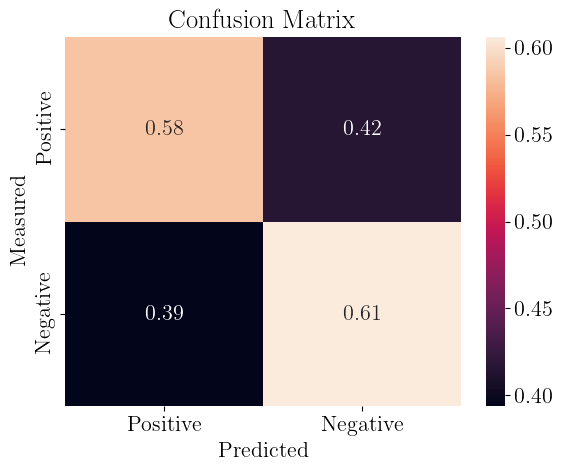

In [11]:
# Statistical quantities of some interest
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)

# Print
print("Sensitivity = {}".format(sensitivity))
print("Specificity = {}".format(specificity))
print("  Precision = {}\n".format(precision))

# Confusion matrix
confMatrix = np.array([[TP/(TP+FP), FP/(TP+FP)], [FN/(TN+FN), TN/(TN+FN)]])

# Plot
ax = sns.heatmap(confMatrix, annot=True)
ax.set_xticklabels(["Positive", "Negative"]);
ax.set_yticklabels(["Positive", "Negative"]);
ax.set_xlabel("Predicted");
ax.set_ylabel("Measured");
ax.set_title("Confusion Matrix");

plt.savefig("plots/confusion-map-colsNorm.pdf", bbox_inches="tight")